<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/TPU_May_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/files')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from collections import Counter
import itertools



In [ ]:
#Check data
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

In [ ]:
print(df_train.shape, df_test.shape)

(900000, 32) (700000, 31)


In [ ]:
df_train.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [ ]:
df_train.info()

# dtype은 float, object 그리고 int이다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

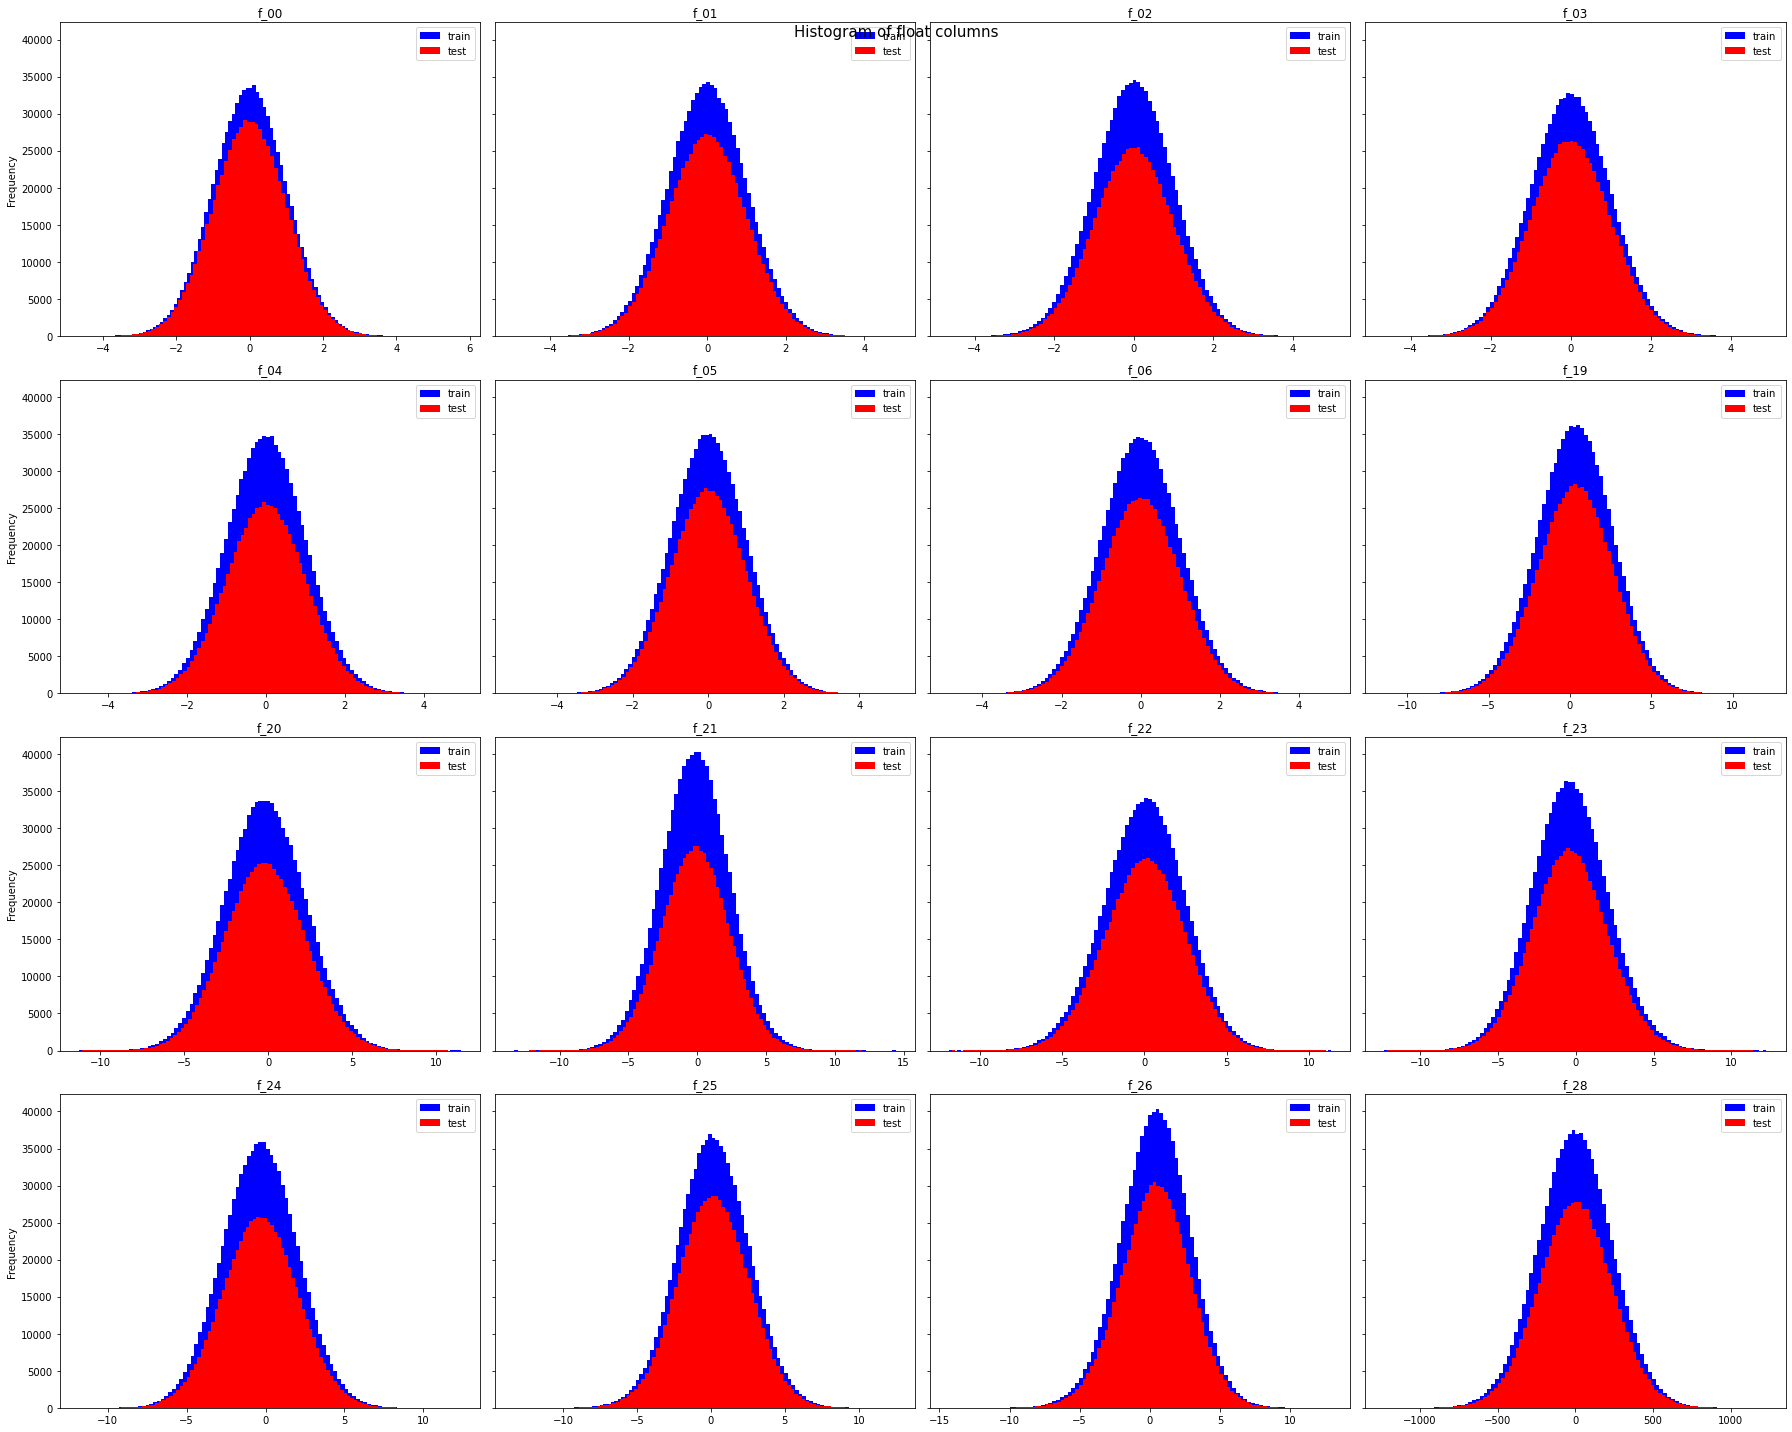

In [ ]:
float_features = [f for f in df_train.columns if df_train[f].dtype == 'float64']
fig, ax = plt.subplots(4,4, figsize = (25,20) , sharey= True)
ax = ax.ravel()

# for i,col in enumerate(df_train.dtypes[df_train.dtypes =="float64"].index):
for i,col in enumerate(float_features):
    df_train[col].plot(ax = ax[i], kind = "hist", bins = 100, color = "b")
    df_test[col].plot(ax = ax[i], kind = "hist", bins = 100, color = "r")
    ax[i].legend(["train", "test"])
    ax[i].set_title(f"{col}")
fig.suptitle("Histogram of float columns", fontsize=15)
plt.tight_layout()
plt.show()




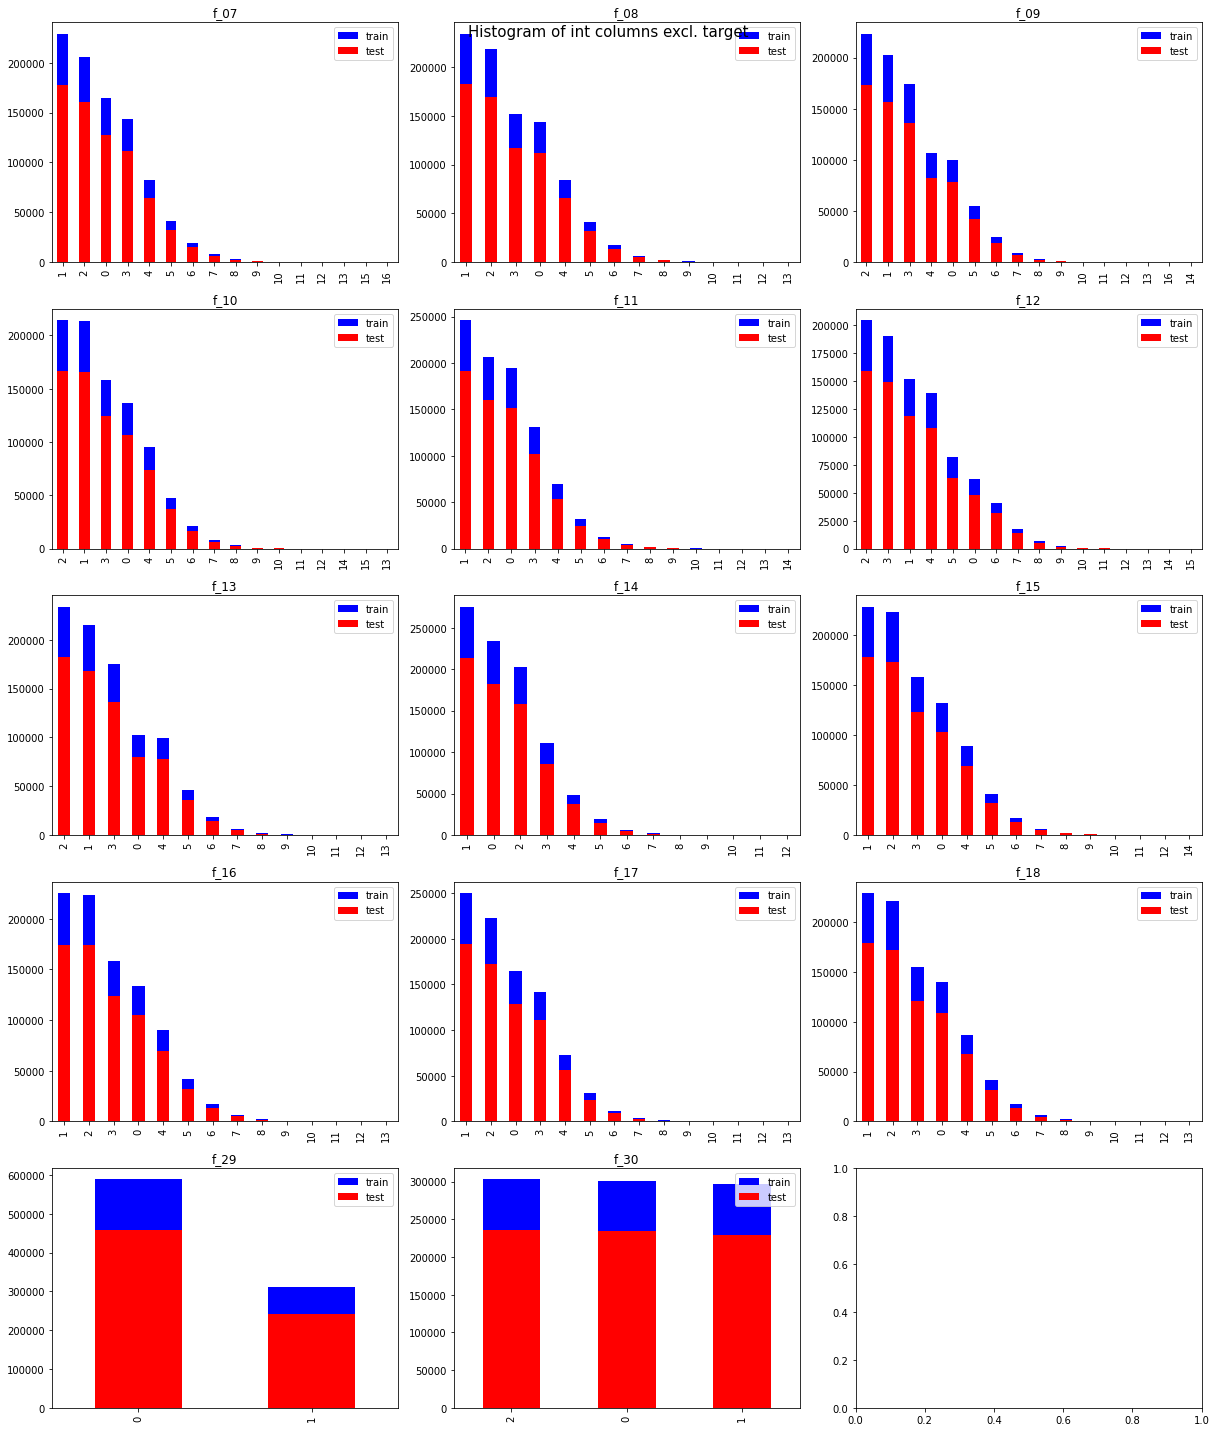

In [ ]:
fig, ax = plt.subplots(5,3, figsize = (17,20))
ax = ax.ravel()

for i,col in enumerate(df_train.dtypes[(df_train.dtypes =="int64") & (df_train.dtypes.index != "target") ].index):
    df_train[col].value_counts().plot(ax = ax[i], kind = "bar",color = "b")
    df_test[col].value_counts().plot(ax = ax[i], kind = "bar",color = "r")
    ax[i].legend(["train", "test"])
    ax[i].set_title(f"{col}")
fig.suptitle("Histogram of int columns excl. target", fontsize=15)
plt.tight_layout()
plt.show()


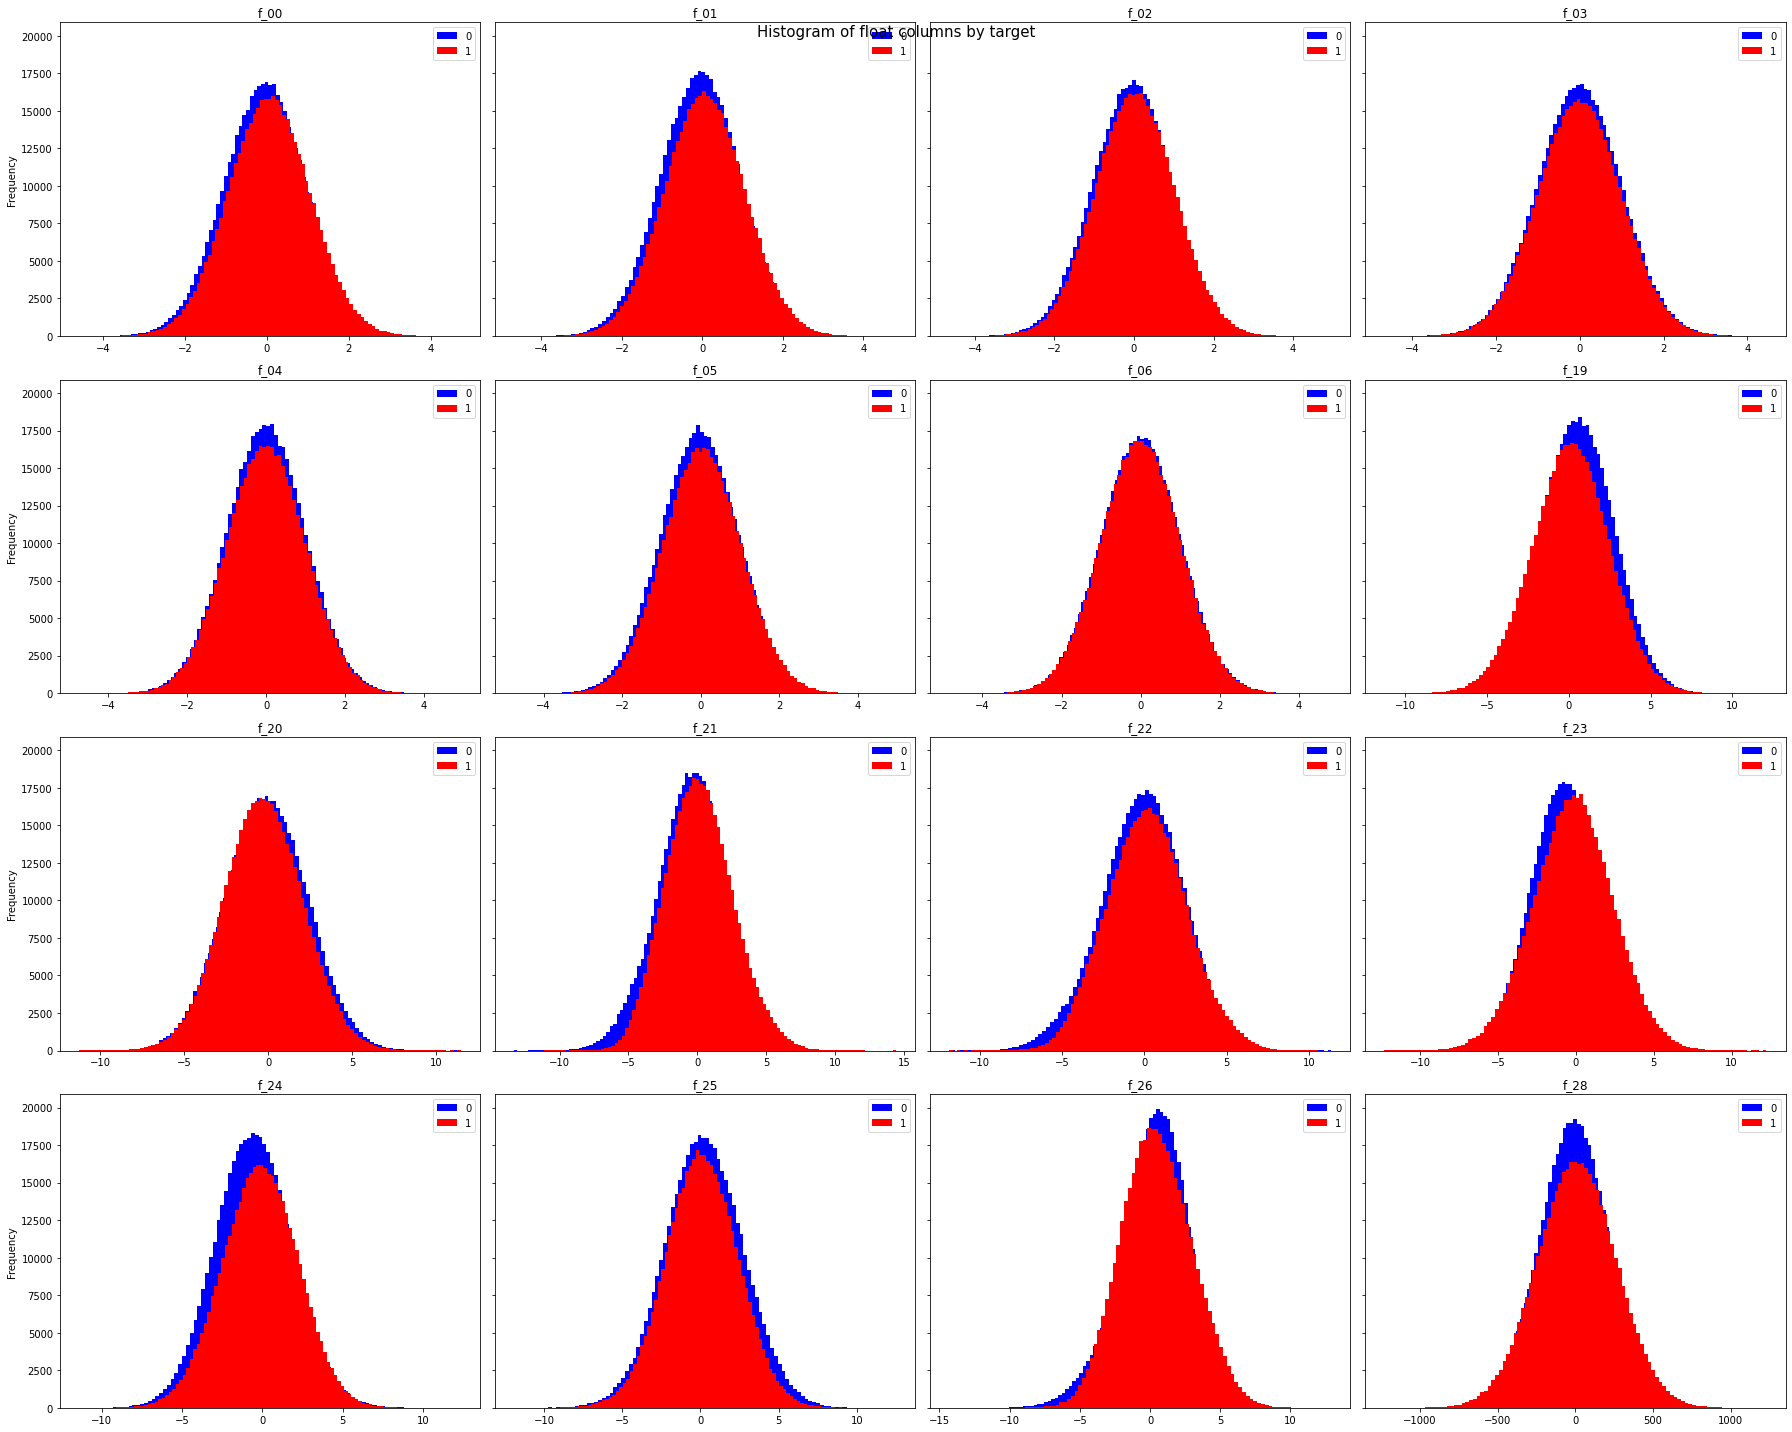

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(25,20), sharey=True)
ax = ax.ravel()

for i,col in enumerate(df_train.dtypes[df_train.dtypes == 'float64'].index):
  df_train[df_train['target']==0][col].plot(ax=ax[i], kind='hist',bins=100, color='b')
  df_train[df_train['target']==1][col].plot(ax=ax[i], kind='hist', bins=100, color='r')
  ax[i].legend(['0','1'])
  ax[i].set_title(f'{col}')

fig.suptitle('Histogram of float columns by target',fontsize=15)
plt.tight_layout()
plt.show()


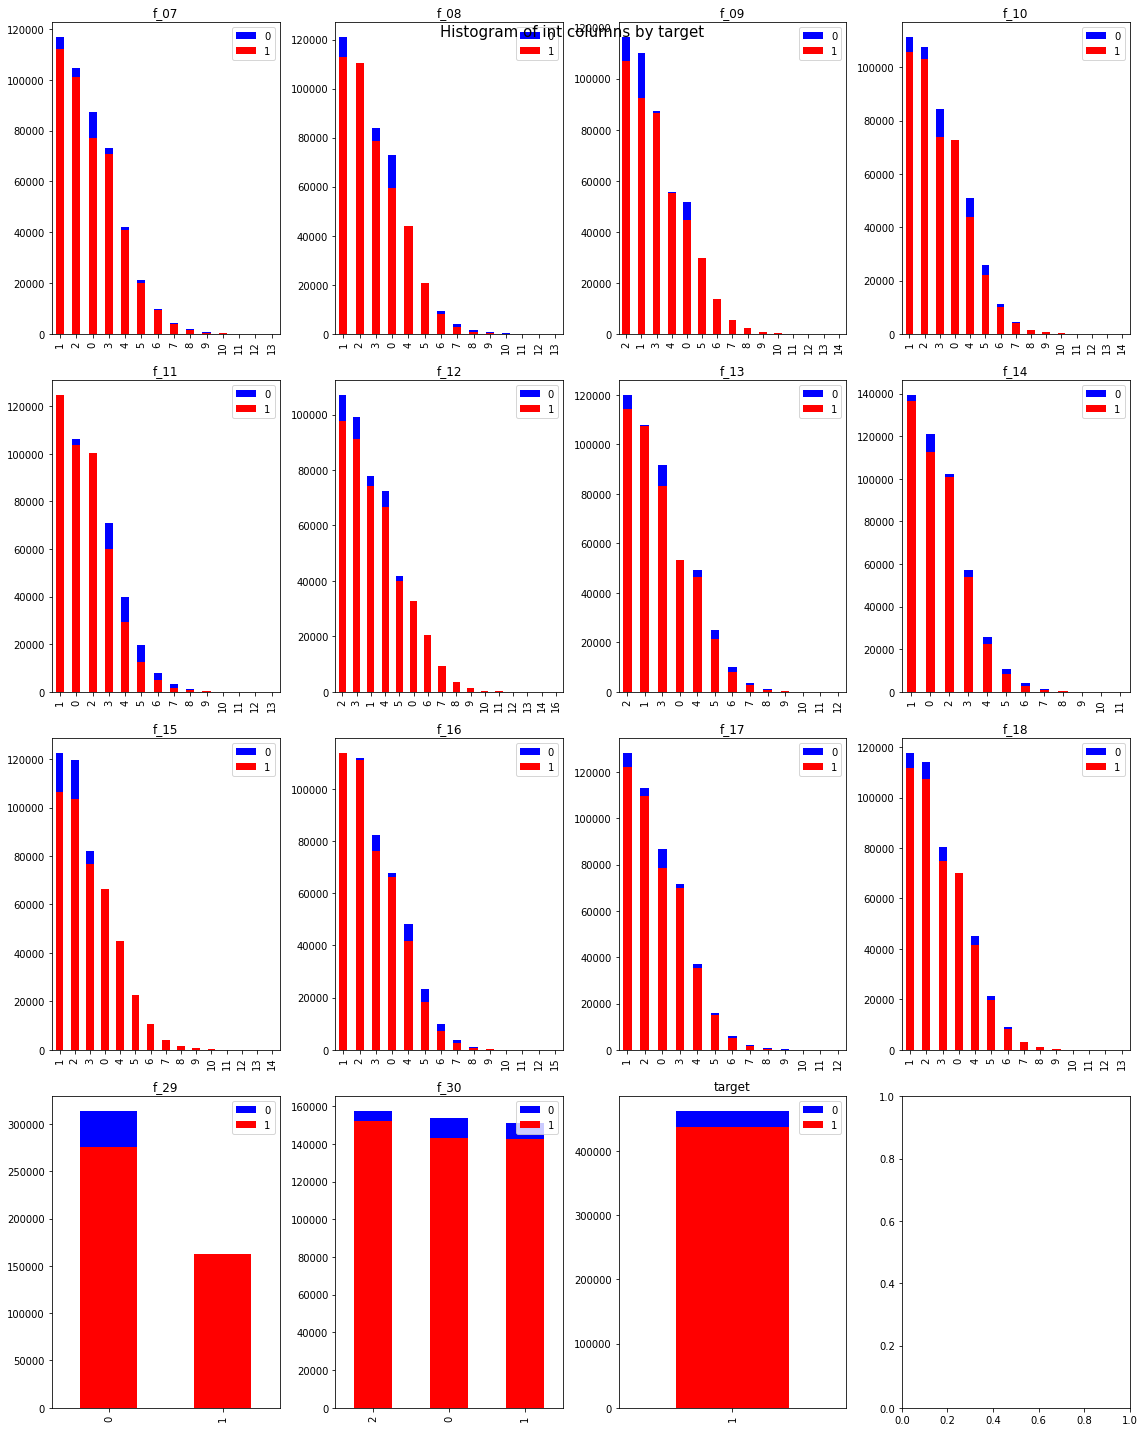

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(16,20))
ax=ax.ravel()

for i, col in enumerate(df_train.dtypes[df_train.dtypes == 'int64'].index):
  df_train[df_train['target']==0][col].value_counts().plot(ax=ax[i], kind='bar', color='b')
  df_train[df_train['target']==1][col].value_counts().plot(ax=ax[i], kind='bar', color='r')
  ax[i].legend(['0','1'])
  ax[i].set_title(f'{col}')

fig.suptitle('Histogram of int columns by target', fontsize=15)
plt.tight_layout()
plt.show()






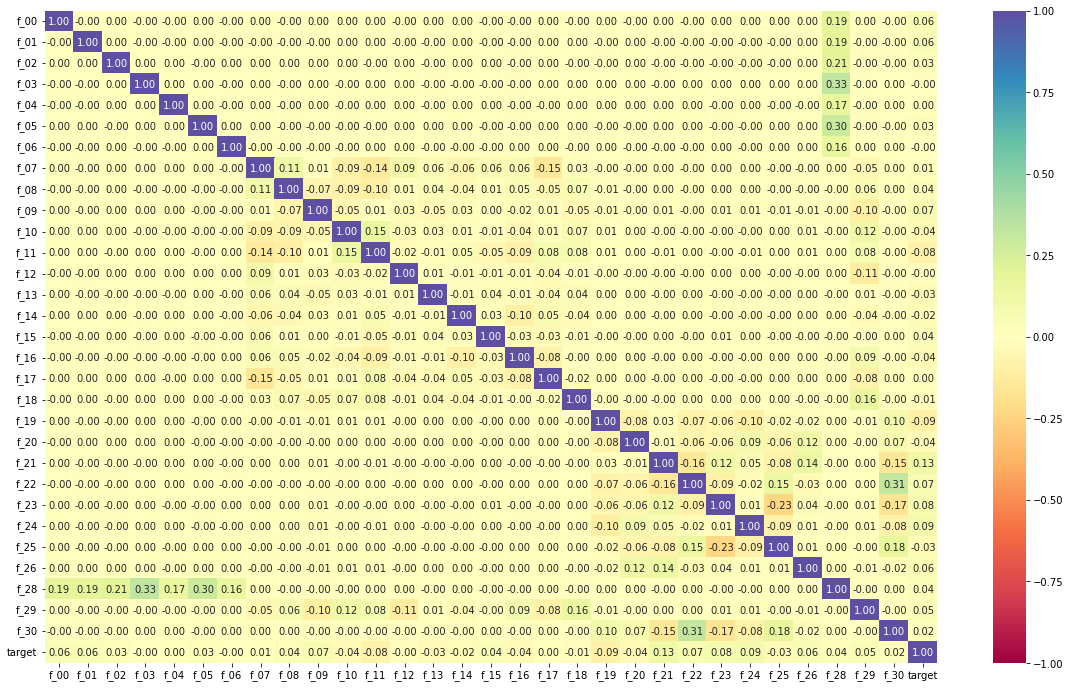

In [ ]:
#Correlation

plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True, vmin=-1, vmax=1,fmt='.2f', cmap='Spectral')


In [ ]:
#Text analysis
display(df_train['f_27'].str.len().unique())
display(df_test['f_27'].str.len().unique())

array([10])

array([10])

In [ ]:
def letter_counter(a):
  count = Counter({})
  for row in a['f_27']:
    count += Counter(row)
  return count

train_0 = letter_counter(df_train[df_train['target']==0])
train_1 = letter_counter(df_train[df_train['target']==1])
train_0



Counter({'A': 1101400,
         'B': 1561809,
         'C': 684075,
         'D': 480569,
         'E': 274611,
         'F': 140825,
         'G': 72263,
         'H': 42189,
         'I': 30611,
         'J': 25995,
         'K': 24408,
         'L': 23447,
         'M': 22814,
         'N': 22281,
         'O': 21431,
         'P': 21031,
         'Q': 20953,
         'R': 19508,
         'S': 17235,
         'T': 14155})

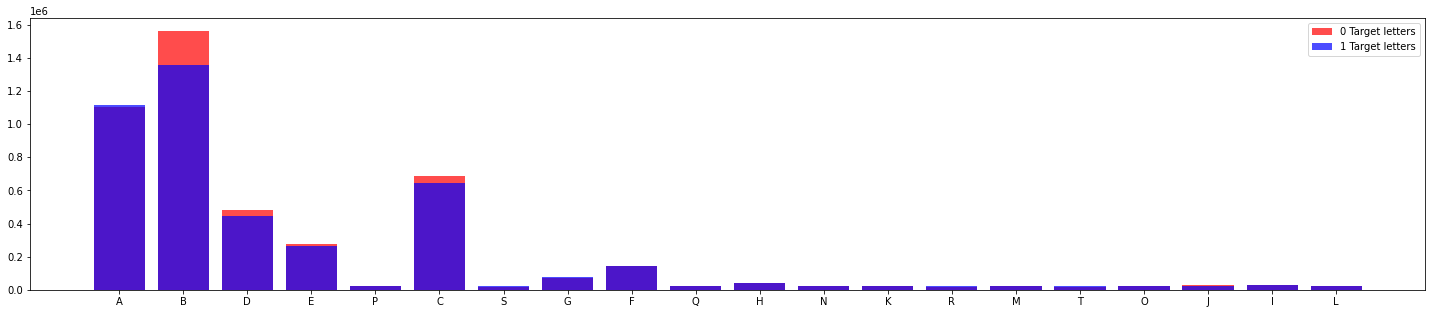

In [ ]:
plt.figure(figsize=(25,5))
plt.bar(train_0.keys(), train_0.values(), color='r', alpha=0.7)
plt.bar(train_1.keys(), train_1.values(), color='b', alpha=0.7)
plt.legend(['0 Target letters', '1 Target letters'])
plt.show()

In [ ]:
def perc_letters(df):
  let_df = pd.DataFrame.from_dict(df, orient='index')
  let_df = let_df/let_df.sum()
  return let_df

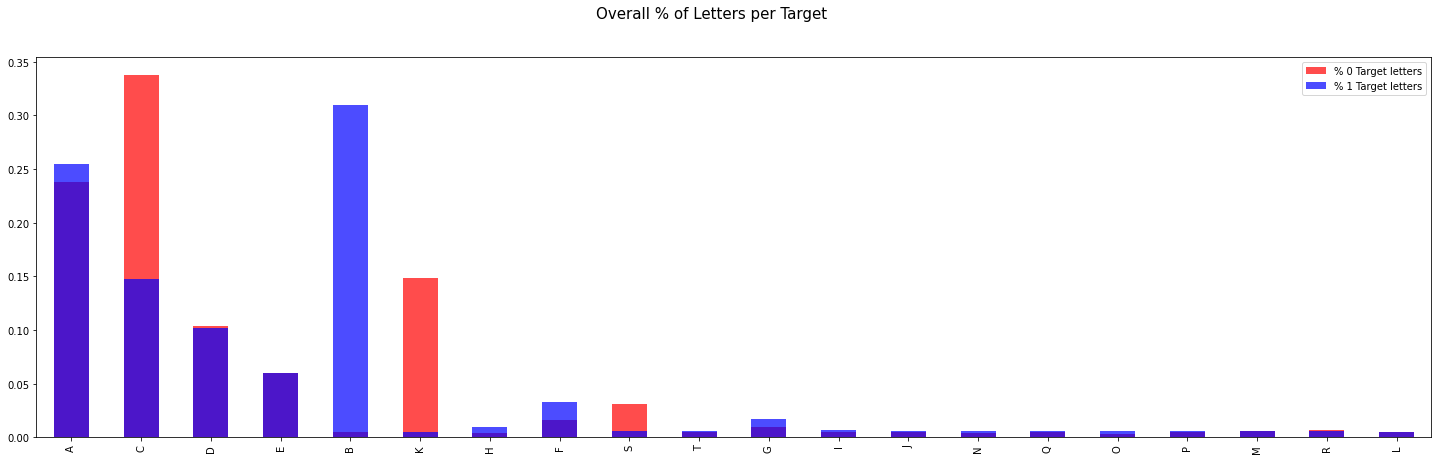

In [ ]:
fig, ax = plt.subplots(figsize= (25,7))
perc_letters(train_0).plot(ax=ax, kind = "bar", color = "r", alpha = 0.7)
perc_letters(train_1).plot(ax=ax, kind = "bar", color = "b", alpha = 0.7 )

ax.legend(["% 0 Target letters", "% 1 Target letters"]);
fig.suptitle("Overall % of Letters per Target", fontsize=15)
plt.show()

In [ ]:
train_0.keys()

dict_keys(['A', 'B', 'D', 'E', 'P', 'C', 'S', 'G', 'F', 'Q', 'H', 'N', 'K', 'R', 'M', 'T', 'O', 'J', 'I', 'L'])

In [ ]:
df_train['f_27'].str.count('A')

id
0         4
1         3
2         5
3         2
4         0
         ..
899995    1
899996    0
899997    2
899998    5
899999    3
Name: f_27, Length: 900000, dtype: int64

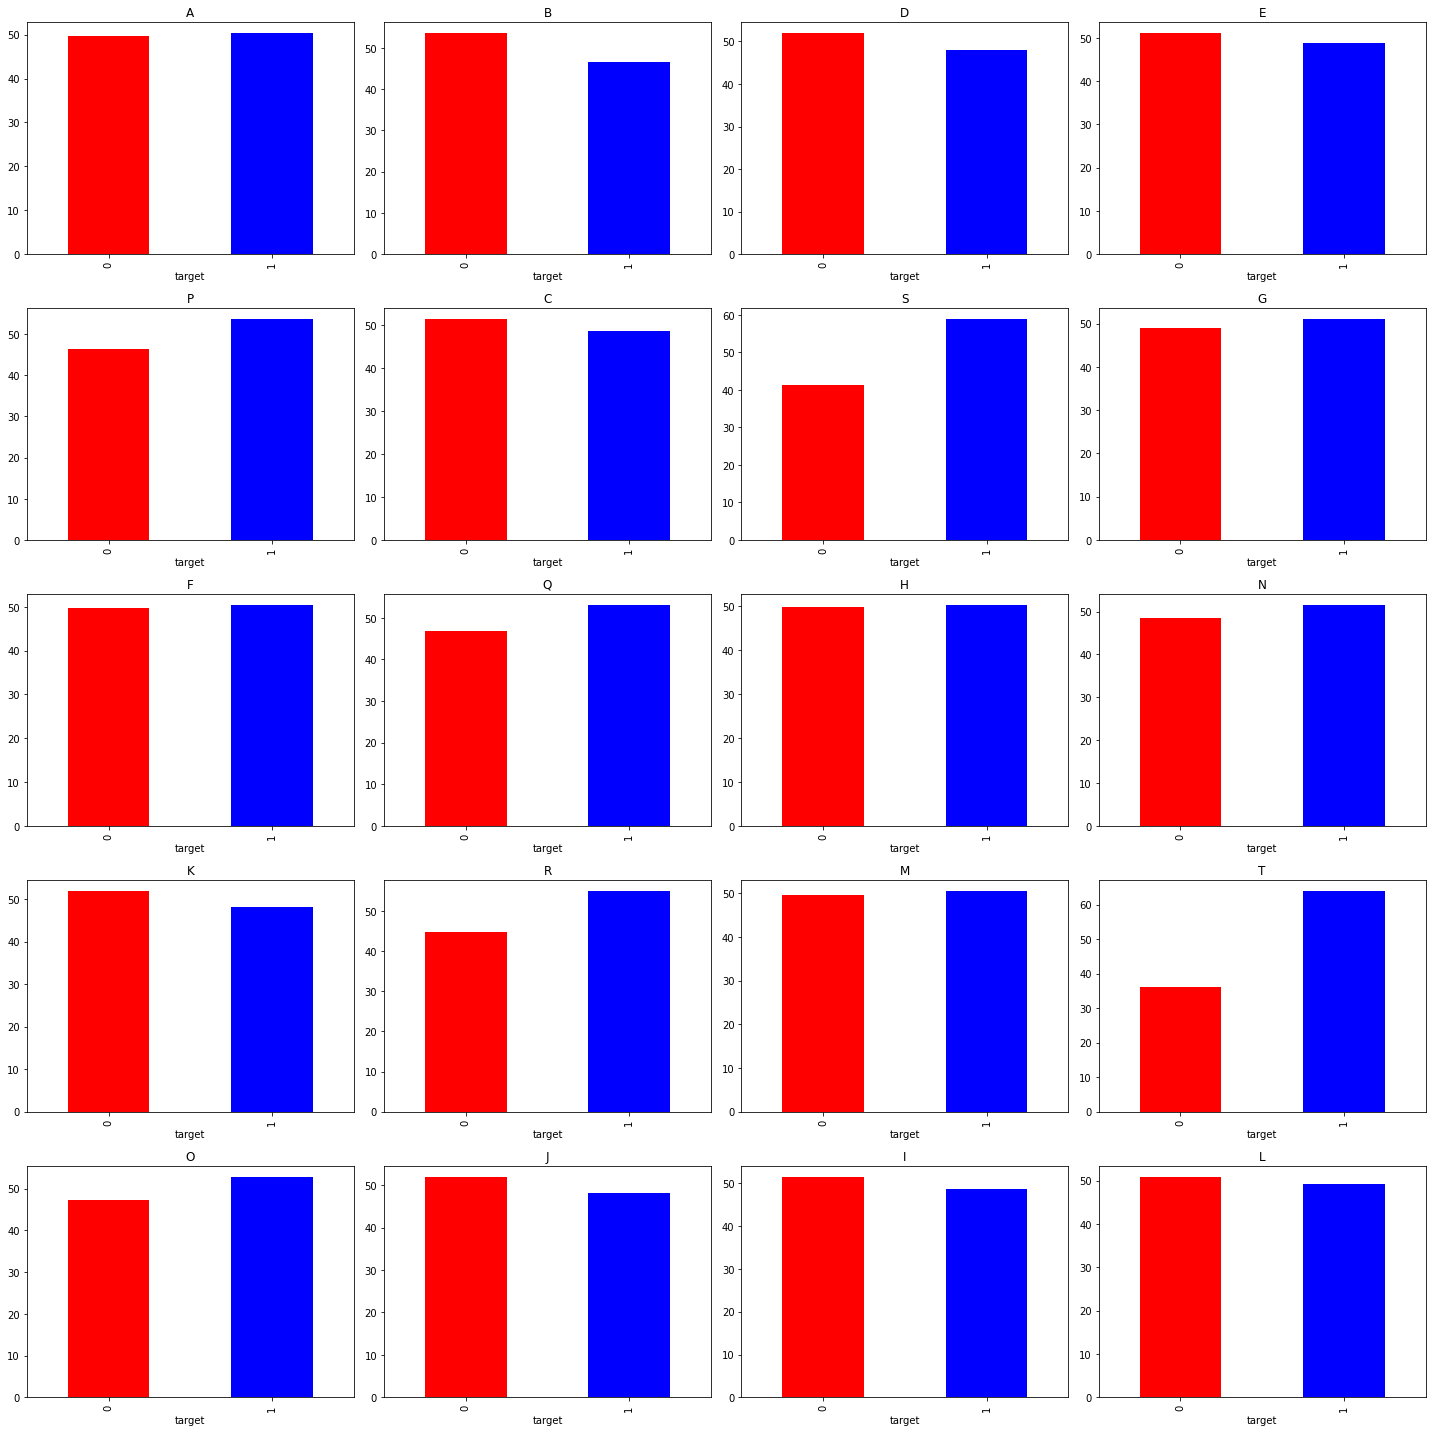

In [ ]:
fig, ax= plt.subplots(5,4, figsize=(20,20))
ax= ax.ravel()

for i, letter in enumerate(train_0.keys()):
  df_train[letter] = df_train['f_27'].str.count(letter)
  df_test[letter] = df_test['f_27'].str.count(letter)

  percentage = (df_train.groupby('target')[letter].sum() / df_train.groupby('target')[letter].sum().sum())*100
  percentage.plot(kind='bar', ax=ax[i], color=['r','b'])
  ax[i].set_title(f'{letter}')

plt.tight_layout()
plt.show()






In [ ]:
df_train.columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28', 'f_29', 'f_30', 'target', 'A', 'B', 'D', 'E', 'P', 'C',
       'S', 'G', 'F', 'Q', 'H', 'N', 'K', 'R', 'M', 'T', 'O', 'J', 'I', 'L'],
      dtype='object')

In [ ]:
X=df_train.drop(['target', 'f_27'], axis=1)
y=df_train['target']

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
sns.set_theme()

CALIBRATION = True
EPOCHS = 500

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [ ]:
model = lgb.LGBMClassifier(n_jobs = -1, n_estimators = EPOCHS)
model.fit(X_train,y_train, eval_set=[(X_test,y_test)], callbacks = [lgb.early_stopping(30)],eval_metric="auc")


In [ ]:
val_preds = model.predict_proba(X_test)
y_preds = model.predict_proba(X_train)
print('Intrinsic AUC:', roc_auc_score(y_train, y_preds[:,1]))
print('Validation AUC:', roc_auc_score(y_test, val_preds[:,1]))

Intrinsic AUC: 0.9550941239290183
Validation AUC: 0.9490476017888125


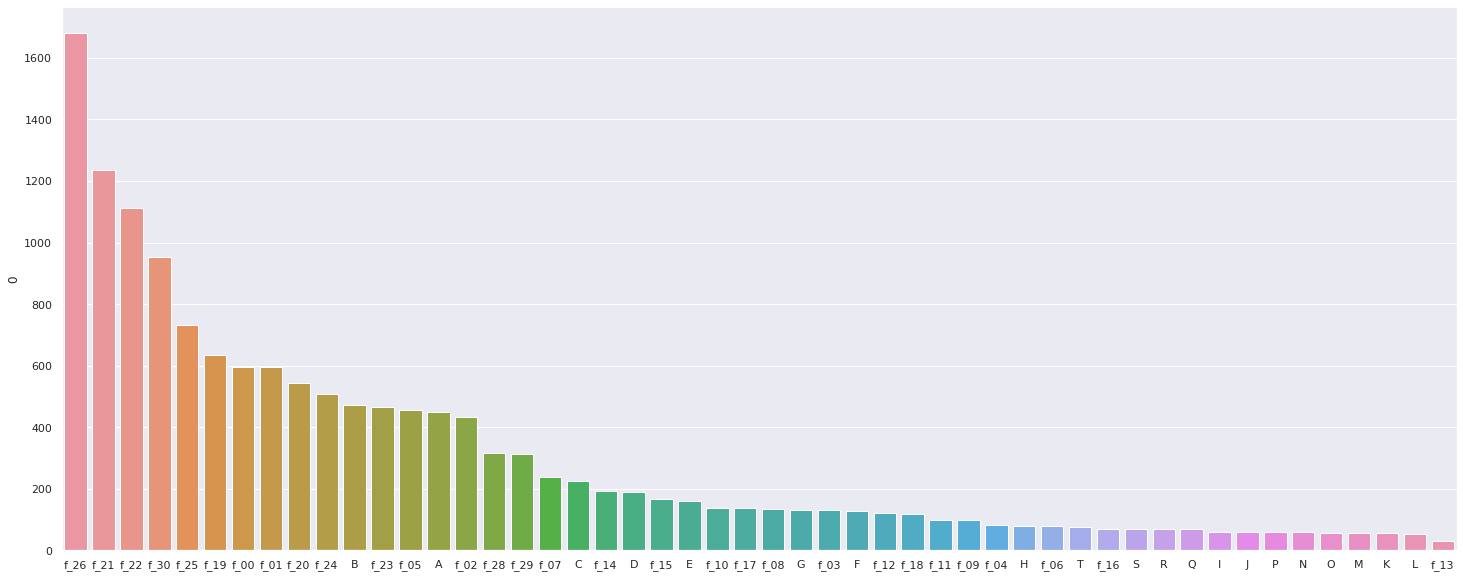

In [ ]:
feat_importance = pd.DataFrame(data=model.feature_importances_, index=df_train.drop(['target', 'f_27'], axis=1).columns).sort_values(ascending=False, by=[0])

plt.figure(figsize=(25,10))
sns.barplot(y=feat_importance[0], x=feat_importance.index)
plt.show()

In [ ]:
feat_importance[feat_importance[0] ==0]

,0


In [ ]:
cv = KFold()